In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
# Matplotlib Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Check header names
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x14f9749c610>,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397',
 'prcp': 0.08}

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temp = []
june_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [6]:
#  3. Convert the June temperatures to a list.
june_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
june_temp

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temp, columns = ['date', 'June Temps'])
june_df

,date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp = []
dec_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [10]:
# 7. Convert the December temperatures to a list.
dec_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
dec_temp

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temp, columns = ['date', 'December Temps'])
dec_df

,date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
# Two Additional Queries  to gather more weather data for June and December
# 1. A query that filters the Measurement table to retrieve the Station IDs, number of observations, and temperatures 
# for the month of June. Group by the Station ID and order  by the number of observations.
Jun_stations = session.query(Measurement.station, func.count(Measurement.station), func.avg(Measurement.tobs)).\
                filter(extract('month', Measurement.date) == 6).group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
Jun_stations

[('USC00519397', 236, 77.55932203389831),
 ('USC00519281', 236, 73.27118644067797),
 ('USC00513117', 236, 74.05084745762711),
 ('USC00519523', 232, 76.66810344827586),
 ('USC00516128', 223, 71.9372197309417),
 ('USC00514830', 186, 76.00537634408602),
 ('USC00511918', 165, 74.13939393939394),
 ('USC00517948', 148, 76.6554054054054),
 ('USC00518838', 38, 73.39473684210526)]

In [14]:
# Put the Jun_stations results into a dataframe using Pandas and name the columns
Jun_stations_df = pd.DataFrame(Jun_stations, columns = ['Station ID', 'No. of Observations', 'Average Temps in June'])
Jun_stations_df

,Station ID,No. of Observations,Average Temps in June
0,USC00519397,236,77.559322
1,USC00519281,236,73.271186
2,USC00513117,236,74.050847
3,USC00519523,232,76.668103
4,USC00516128,223,71.937220
5,USC00514830,186,76.005376
6,USC00511918,165,74.139394
7,USC00517948,148,76.655405
8,USC00518838,38,73.394737


In [15]:
# 2. Write a similar query that filters the Measurement table to retrieve the Station IDs, number of observations, 
# and temperatures for the month of December
Dec_stations = session.query(Measurement.station, func.count(Measurement.station), func.avg(Measurement.tobs)).\
                filter(extract('month', Measurement.date) == 12).group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
Dec_stations

[('USC00519281', 217, 69.90322580645162),
 ('USC00513117', 216, 71.06944444444444),
 ('USC00519523', 210, 72.43333333333334),
 ('USC00519397', 210, 71.10952380952381),
 ('USC00516128', 206, 69.29126213592232),
 ('USC00514830', 178, 73.2247191011236),
 ('USC00511918', 152, 69.6842105263158),
 ('USC00517948', 109, 71.8348623853211),
 ('USC00518838', 19, 72.42105263157895)]

In [16]:
# Put the Dec_stations results into a dataframe using Pandas and name the columns
Dec_stations_df = pd.DataFrame(Dec_stations, columns = ['Station ID', 'No. of Observations', 'Average Temps in December'])
Dec_stations_df

,Station ID,No. of Observations,Average Temps in December
0,USC00519281,217,69.903226
1,USC00513117,216,71.069444
2,USC00519523,210,72.433333
3,USC00519397,210,71.109524
4,USC00516128,206,69.291262
5,USC00514830,178,73.224719
6,USC00511918,152,69.684211
7,USC00517948,109,71.834862
8,USC00518838,19,72.421053


In [17]:
# Merge the June and december Dataframes to see a comparison
Jun_Dec_df = pd.merge(Jun_stations_df, Dec_stations_df, how = "left", on = ['Station ID'])
Jun_Dec_df.columns = ['Station ID', 'No of Obs in June', 'Avg Temps in Jun', 'No of Obs in Dec', 'Avg Temps in Dec']
Jun_Dec_df

,Station ID,No of Obs in June,Avg Temps in Jun,No of Obs in Dec,Avg Temps in Dec
0,USC00519397,236,77.559322,210,71.109524
1,USC00519281,236,73.271186,217,69.903226
2,USC00513117,236,74.050847,216,71.069444
3,USC00519523,232,76.668103,210,72.433333
4,USC00516128,223,71.937220,206,69.291262
5,USC00514830,186,76.005376,178,73.224719
6,USC00511918,165,74.139394,152,69.684211
7,USC00517948,148,76.655405,109,71.834862
8,USC00518838,38,73.394737,19,72.421053


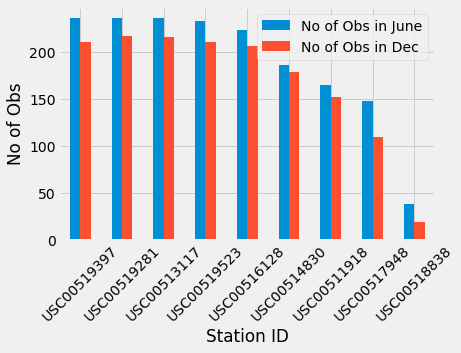

In [18]:
# Plot a comparison of no of Observations per station in June and December
Jun_Dec_df.plot.bar(x = 'Station ID', y = ['No of Obs in June','No of Obs in Dec'])
plt.ylabel('No of Obs')
plt.xticks(rotation=45)
plt.show()

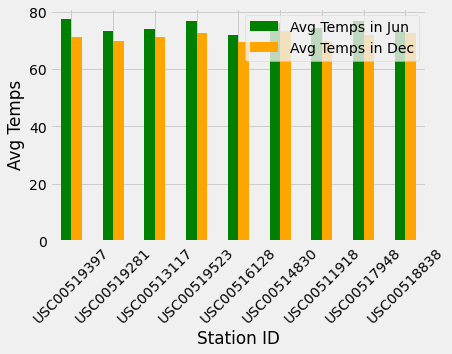

In [19]:
# Plot a comparison of average temperatures per station in June and December
Jun_Dec_df.plot.bar(x = 'Station ID', y = ['Avg Temps in Jun','Avg Temps in Dec'], color = ['green', 'orange'])
plt.ylabel('Avg Temps')
plt.xticks(rotation=45)
plt.show()